# JWST Pipeline Validation Testing Notebook: MIRI LRS Slitless spectroscopy

# Step: flat_field() in Spec2Pipeline

**Instruments Affected**: MIRI

# Table of Contents

 - Imports
 - Introduction
 - Run Pipeline
 - Flat Field Step Check

# Imports

 - os for simple operating system functions
 - gwcs.wcstools for bounding box operations
 - astropy.io for opening fits files
 - inspect to get the docstring of our objects.
 - IPython.display for printing markdown output
 - jwst.datamodels for building model for JWST Pipeline
 - jwst.module.PipelineStep is the pipeline step being tested
 - matplotlib.pyplot to generate plot
 - matplotlib.patches to plot shapes
 - crds for retrieving a reference file
 - astropy.utils for Box access to data
 - glob for file searching operations

In [14]:
from astropy.io import fits
import matplotlib.pyplot as plt
import statistics as stat
import numpy as np
from jwst.pipeline import Detector1Pipeline, Spec2Pipeline, collect_pipeline_cfgs
from jwst.pipeline import Spec2Pipeline
from jwst.background import BackgroundStep
from jwst.assign_wcs import AssignWcsStep
from jwst.extract_2d import Extract2dStep
from jwst.flatfield import FlatFieldStep
from astropy.utils.data import download_file
from jwst.datamodels import ImageModel, CubeModel
import crds
import os
import glob
from jwst import datamodels

# Introduction
For this test we are using the flat fielding step for MIRI LRS slitless (TSO) data. For more information on the pipeline step visit the links below.
  
Step description: https://jwst-pipeline.readthedocs.io/en/latest/jwst/flatfield/main.html#imaging-and-non-nirspec-spectroscopic-data
  
Pipeline code: https://github.com/spacetelescope/jwst/tree/master/jwst/flat_field
  
## Defining Terms

 - JWST: James Webb Space Telescope 
 - MIRI: Mid-Infrared Instrument 
 - LRS: Low Resolution Spectrometer

## Retrieving data

The simulated data are stored in Box and can be retrieved from there programmatically. The simulated data were generated with MIRISim v2.3.0. The observation consists of an observation of a stellar source in the slitless view. In this scenario, one exposures is executed at the center of the field of view.

In [6]:
mainurl ="https://data.science.stsci.edu/redirect/JWST/TSO/pipeline_testing_miri_LRS_tso/"
fname = 'pipetest_miri_lrs_tso_100G10I.fits'
fdld = download_file(mainurl+fname)
hdu = fits.open(fdld)
hdu.info()
sci_mod = RampModel(hdu)

Filename: /var/folders/lf/br5qbz194xd6951d98qqk2ym0000gn/T/astropy-download-33591-vmvtulh3
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     116   ()      
  1  SCI           1 ImageHDU        51   (72, 416, 100, 10)   float32   
  2  PIXELDQ       1 ImageHDU        11   (72, 416)   int32 (rescales to uint32)   
  3  REFOUT        1 ImageHDU        11   (18, 416, 100, 10)   float32   
  4  ASDF          1 BinTableHDU     11   1R x 1C   [6008B]   


# Run Pipeline
The simulated data were generated with MIRISim v2.3.0. The observation consists of an observation of a stellar source in the slitless subarray. In this scenario, one exposure is executed at the nominal pointing location.
In the first steps we run the Detector1 pipeline, and the Spec2 pipeline steps before flat fielding.
  
**TO DO: data to be placed into a central location such as artifactory.**

In [7]:
if not os.path.exists('../cfg_files/'):
    os.mkdir('../cfg_files/')
    cfgs = collect_pipeline_cfgs.collect_pipeline_cfgs(dst='../cfg_files/')

In [8]:
# KM file location
#det1 = Detector1Pipeline.call('slitless_sim/det_images/det_image_seq1_MIRIMAGE_P750Lexp1.fits', config_file='../cfg_files/calwebb_detector1.cfg', save_results=True)

# Box file location:
det1 = Detector1Pipeline.call(sci_mod, config_file='../cfg_files/calwebb_detector1.cfg', save_results=True)

2020-08-27 09:53:25,954 - CRDS - ERROR -  Error determining best reference for 'pars-groupscalestep'  =   Unknown reference type 'pars-groupscalestep'
2020-08-27 09:53:25,960 - CRDS - ERROR -  Error determining best reference for 'pars-dqinitstep'  =   Unknown reference type 'pars-dqinitstep'
2020-08-27 09:53:25,966 - CRDS - ERROR -  Error determining best reference for 'pars-saturationstep'  =   Unknown reference type 'pars-saturationstep'
2020-08-27 09:53:26,024 - CRDS - ERROR -  Error determining best reference for 'pars-ipcstep'  =   Unknown reference type 'pars-ipcstep'
2020-08-27 09:53:26,031 - CRDS - ERROR -  Error determining best reference for 'pars-superbiasstep'  =   Unknown reference type 'pars-superbiasstep'
2020-08-27 09:53:26,039 - CRDS - ERROR -  Error determining best reference for 'pars-refpixstep'  =   Unknown reference type 'pars-refpixstep'
2020-08-27 09:53:26,045 - CRDS - ERROR -  Error determining best reference for 'pars-rscd_step'  =   Unknown reference type 'p

2020-08-27 09:53:26,217 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'astropy-download-33591-vmvtulh3' reftypes = ['dark', 'gain', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2020-08-27 09:53:26,225 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/Users/kendrew//crds_cache/references/jwst/miri/jwst_miri_dark_0048.fits'.
2020-08-27 09:53:26,226 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/Users/kendrew//crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2020-08-27 09:53:26,227 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/Users/kendrew//crds_cache/references/jwst/miri/jwst_miri_linearity_0024.fits'.
2020-08-27 09:53:26,227 - stpipe.Detector1Pipeline - INFO - Prefetch for MASK reference file is '/Users/kendrew//crds_cache/references/jwst/miri/jwst_miri_mask_0023.fits'.
2020-08-27 09:53:26,228

2020-08-27 09:53:29,191 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd done
2020-08-27 09:53:29,319 - stpipe.Detector1Pipeline.dark_current - INFO - Step dark_current running with args (<RampModel(10, 100, 416, 72) from astropy-download-33591-vmvtulh3>,).
2020-08-27 09:53:29,321 - stpipe.Detector1Pipeline.dark_current - INFO - Step dark_current parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'dark_output': None}
2020-08-27 09:53:29,336 - stpipe.Detector1Pipeline.dark_current - INFO - Using DARK reference file /Users/kendrew//crds_cache/references/jwst/miri/jwst_miri_dark_0048.fits
2020-08-27 09:53:29,702 - stpipe.Detector1Pipeline.dark_current - INFO - Science data nints=10, ngroups=100, nframes=1, groupgap=0
2020-08-27 09:53:29,703 - stpipe.Detector1Pipeline.dark_c

2020-08-27 09:54:45,548 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(416, 72) from astropy-download-33591-vmvtulh3>,).
2020-08-27 09:54:45,549 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search_output_file': True, 'input_dir': ''}
2020-08-27 09:54:45,581 - stpipe.Detector1Pipeline.gain_scale - INFO - GAINFACT not found in gain reference file
2020-08-27 09:54:45,582 - stpipe.Detector1Pipeline.gain_scale - INFO - Step will be skipped
2020-08-27 09:54:45,586 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale done
2020-08-27 09:54:45,706 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<CubeModel(10, 416, 72) from astropy-download-33591-vmvtulh3>,).
2

The ``det1`` output corresponds to the \_rate.fits file, which has the integrations co-added. For time series observations, we proceed with the \_rateints.fits file, in which integrations are not co-added. So we find that file and load it in for further processing.

In [26]:
rifile = glob.glob('*_rateints.fits')
print(rifile)

det1_ints = datamodels.open(rifile[0])


['astropy-download-33591-vmvtulh3_rateints.fits']


Now we run the assign_wcs(), extract2d() steps with this model. Extract2d should do nothing for slitless LRS data.

In [35]:
awcs = AssignWcsStep.call(det1_ints, config_file='../cfg_files/assign_wcs.cfg', save_results=True)
e2d = Extract2dStep.call(awcs, config_file='../cfg_files/extract_2d.cfg', save_results='True')


2020-08-27 10:31:48,972 - CRDS - ERROR -  Error determining best reference for 'pars-assignwcsstep'  =   Unknown reference type 'pars-assignwcsstep'
2020-08-27 10:31:48,975 - stpipe.assign_wcs - INFO - AssignWcsStep instance created.
2020-08-27 10:31:49,241 - stpipe.assign_wcs - INFO - Step assign_wcs running with args (<CubeModel(10, 416, 72) from astropy-download-33591-vmvtulh3_rateints.fits>,).
2020-08-27 10:31:49,244 - stpipe.assign_wcs - INFO - Step assign_wcs parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'slit_y_low': -0.55, 'slit_y_high': 0.55}
2020-08-27 10:31:49,744 - stpipe.assign_wcs - INFO - Created a MIRI mir_lrs-slitless pipeline with references {'distortion': '/Users/kendrew//crds_cache/references/jwst/miri/jwst_miri_distortion_0028.asdf', 'filteroffset'

In [36]:
ff = FlatFieldStep.call(e2d, config_file='../cfg_files/flat_field.cfg', save_results='True')

2020-08-27 10:31:55,832 - CRDS - ERROR -  Error determining best reference for 'pars-flatfieldstep'  =   Unknown reference type 'pars-flatfieldstep'
2020-08-27 10:31:55,837 - stpipe.flat_field - INFO - FlatFieldStep instance created.
2020-08-27 10:31:56,104 - stpipe.flat_field - INFO - Step flat_field running with args (<CubeModel(10, 416, 72) from astropy-download-33591-vmvtulh3_extract_2d.fits>,).
2020-08-27 10:31:56,105 - stpipe.flat_field - INFO - Step flat_field parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_interpolated_flat': False}
2020-08-27 10:31:56,168 - stpipe.flat_field - WARNING - Keyword CDP_PARTIAL_DATA does not correspond to an existing DQ mnemonic, so will be ignored
2020-08-27 10:31:56,169 - stpipe.flat_field - WARNING - Keyword CDP_LOW_QUAL doe

# Flat Field Step Check
Now that we have the output from the flat fielding step, we will download the reference file from crds and perform an independent check that the step is correctly executed.

TypeError: Invalid shape (10, 416, 72) for image data

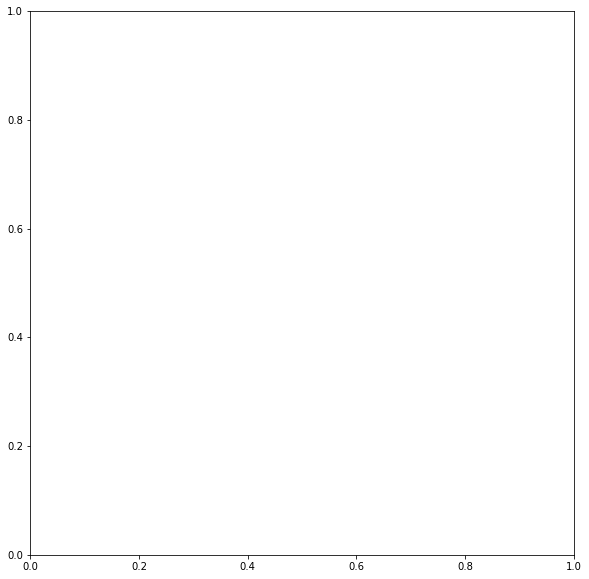

In [37]:
fig = plt.figure(figsize=[12,10])
plt.imshow(ff.data, origin='lower')
plt.title('Data - flat fielded')
plt.colorbar()

In [16]:
flat_reffile = ff.meta.ref_file.flat.name
basename = crds.core.config.pop_crds_uri(flat_reffile)
filepath = crds.locate_file(basename, "jwst")
reffile =  datamodels.open(filepath)

2020-08-25 13:02:42,504 - stpipe - WARNING - Keyword CDP_PARTIAL_DATA does not correspond to an existing DQ mnemonic, so will be ignored
2020-08-25 13:02:42,505 - stpipe - WARNING - Keyword CDP_LOW_QUAL does not correspond to an existing DQ mnemonic, so will be ignored
2020-08-25 13:02:42,506 - stpipe - WARNING - Keyword CDP_UNRELIABLE_ERROR does not correspond to an existing DQ mnemonic, so will be ignored
2020-08-25 13:02:42,507 - stpipe - WARNING - Keyword DIFF_PATTERN does not correspond to an existing DQ mnemonic, so will be ignored


In [17]:
manflat = e2d.data / reffile.data

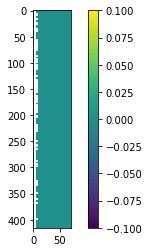

In [21]:
fcheck = (ff.data - manflat)
plt.imshow(fcheck)
plt.colorbar()

In [26]:
nans = np.isnan(fcheck)
print('Min difference between manual & pipeline files, nod 1 = {0} -- Max = {1}'.format(np.min(fcheck[~nans]), np.max(fcheck[~nans])))

# perform a numeric check. Ignoring NaNs for now as these do not fully match:
assert np.allclose(ff.data[~nans], manflat[~nans], equal_nan=True), "Pipeline calibrated file doesn't match the manual check to within tolerances"

Min difference between manual & pipeline files, nod 1 = 0.0 -- Max = 0.0


If all assert statements in this notebook PASS, then the test is successful.
  
## END
  
Authors: K. Murray (kmurray@stsci.edu), S. Kendrew (sarah.kendrew@esa.int) -- MIRI branch